In [1]:
import numpy as np
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import torch
%matplotlib inline

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

In [22]:
w2i = defaultdict(lambda: len(w2i))
sentence = "root john saw mary".split()
sentence_ids = [w2i[token] for token in sentence]
num_words = len(sentence)
i2w = {i: w for w, i in w2i.items()}

print(sentence)
print(sentence_ids)
print(num_words)

['root', 'john', 'saw', 'mary']
[0, 1, 2, 3]
4


In [23]:
# define the scores
scores = np.full([num_words, num_words], -1.)
scores[w2i['root']][w2i['saw']] = 10.
scores[w2i['root']][w2i['mary']] = 9.
scores[w2i['root']][w2i['john']] = 9.
scores[w2i['john']][w2i['saw']] = 20.
scores[w2i['john']][w2i['mary']] = 3.
scores[w2i['saw']][w2i['mary']] = 30.
scores[w2i['saw']][w2i['john']] = 30.
scores[w2i['mary']][w2i['john']] = 11.
scores[w2i['mary']][w2i['saw']] = 0.

print(scores)

[[ -1.   9.  10.   9.]
 [ -1.  -1.  20.   3.]
 [ -1.  30.  -1.  30.]
 [ -1.  11.   0.  -1.]]


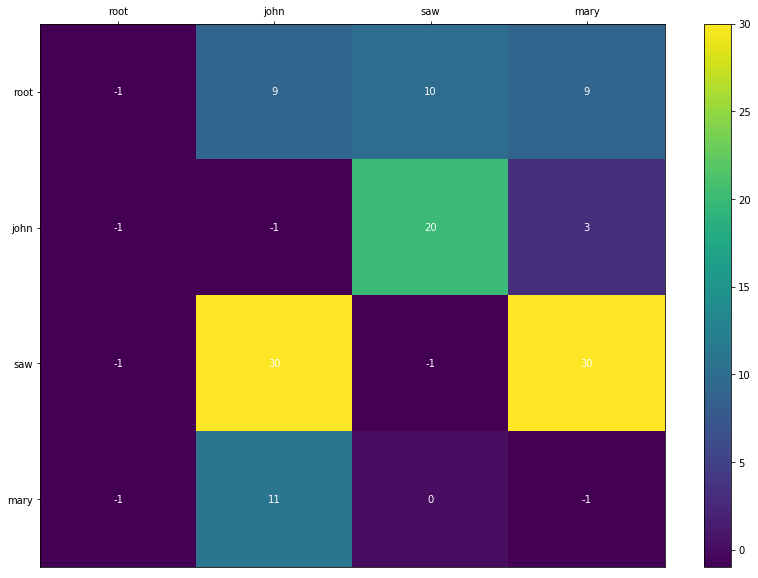

In [24]:
def plot_heatmap(scores, sentence):

    # make heatmap with the scores
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(scores, cmap='viridis')

    # set tick labels to the words
    ax.set_xticklabels(sentence, minor=False)
    ax.set_yticklabels(sentence, minor=False)

    # put the major ticks at the middle of each cell
    # and the x-ticks on top
    ax.xaxis.tick_top()
    ax.set_xticks(np.arange(scores.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(scores.shape[0]) + 0.5, minor=False)
    ax.invert_yaxis()

    # display values
    for y in range(scores.shape[0]):
        for x in range(scores.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.0f' % scores[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='w')

    plt.colorbar(heatmap)
    plt.show()
    
plot_heatmap(scores, sentence)

## A custom example from en_ewt-ud-train.conllu

In [25]:
tokens = ["My","point",":","Even","if","I","was","wrong",",","do","n't","sit","there","and","argue","with","the","customer","."]
print(len(tokens))
print(tokens)

19
['My', 'point', ':', 'Even', 'if', 'I', 'was', 'wrong', ',', 'do', "n't", 'sit', 'there', 'and', 'argue', 'with', 'the', 'customer', '.']


In [26]:
# note, the root here is made up
indices = ["(1, 0)","(0, 1)","(1, 2)","(7, 3)","(7, 4)","(7, 5)","(7, 6)","(11, 7)","(11, 8)","(11, 9)","(11, 10)","(1, 11)","(11, 12)","(14, 13)","(1, 14)","(11, 14)","(17, 15)","(17, 16)","(14, 17)","(1, 18)"]
print(len(indices))
print(indices)

20
['(1, 0)', '(0, 1)', '(1, 2)', '(7, 3)', '(7, 4)', '(7, 5)', '(7, 6)', '(11, 7)', '(11, 8)', '(11, 9)', '(11, 10)', '(1, 11)', '(11, 12)', '(14, 13)', '(1, 14)', '(11, 14)', '(17, 15)', '(17, 16)', '(14, 17)', '(1, 18)']


In [27]:
labels = [3,4,0,1,5,6,7,8,0,9,1,2,1,10,2,11,12,13,14,0]
print(len(labels))
print(labels)

20
[3, 4, 0, 1, 5, 6, 7, 8, 0, 9, 1, 2, 1, 10, 2, 11, 12, 13, 14, 0]


In [28]:
coords = [[-1.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [3.0, -1.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 2.0, -1.0, -1.0, 2.0, -1.0, -1.0, -1.0, 0.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, 1.0, 5.0, 6.0, 7.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 8.0, 0.0, 9.0, 1.0, -1.0, 1.0, -1.0, 11.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 10.0, -1.0, -1.0, -1.0, 14.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 12.0, 13.0, -1.0, -1.0],
          [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]]

print(len(coords))
print(coords)

19
[[-1.0, 4.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [3.0, -1.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 2.0, -1.0, -1.0, 2.0, -1.0, -1.0, -1.0, 0.0], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, 1.0, 5.0, 6.0, 7.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,

In [29]:
for hm, label in zip(indices, labels):
    print(hm, "==>", label)

(1, 0) ==> 3
(0, 1) ==> 4
(1, 2) ==> 0
(7, 3) ==> 1
(7, 4) ==> 5
(7, 5) ==> 6
(7, 6) ==> 7
(11, 7) ==> 8
(11, 8) ==> 0
(11, 9) ==> 9
(11, 10) ==> 1
(1, 11) ==> 2
(11, 12) ==> 1
(14, 13) ==> 10
(1, 14) ==> 2
(11, 14) ==> 11
(17, 15) ==> 12
(17, 16) ==> 13
(14, 17) ==> 14
(1, 18) ==> 0


In [30]:
tensor = torch.LongTensor(coords)
print(tensor)

tensor([[-1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [ 3, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  2, -1, -1, -1,
          0],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1,  1,  5,  6,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

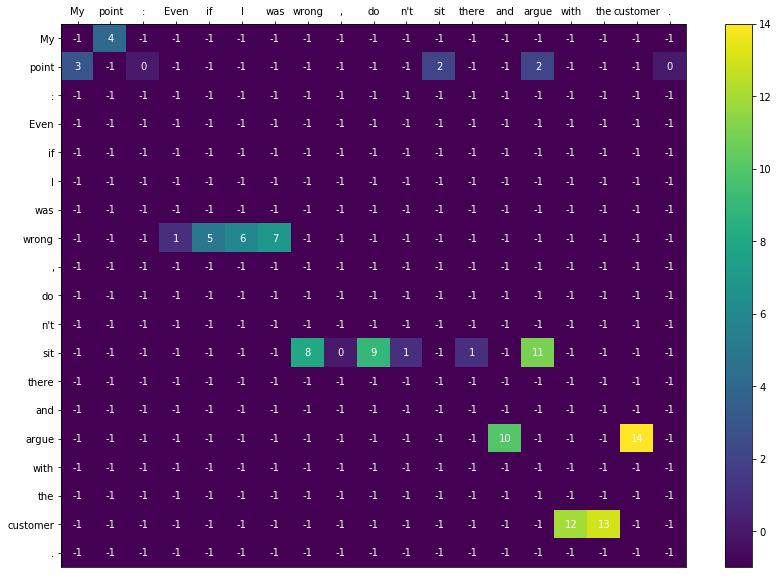

In [31]:
plot_heatmap(tensor, tokens)

In [37]:
double_sentence = ['John', 'wants', 'to', 'eat']
heads = [[1, 3], [0], [3], [1]]
relations = ['nsubj', 'nsubj', 'root', 'det', 'cc']

In [38]:
indices = []
for modifier, hs in enumerate(heads):
    for h in hs:
        print(h, "==>", modifier)
        indices.append((h, modifier))

print(indices)

1 ==> 0
3 ==> 0
0 ==> 1
3 ==> 2
1 ==> 3
[(1, 0), (3, 0), (0, 1), (3, 2), (1, 3)]


In [39]:
padded_tensor = np.full([num_words, num_words], -1)
for index in indices:
    padded_tensor[index] = 1

print(padded_tensor)

[[-1  1 -1 -1]
 [ 1 -1 -1  1]
 [-1 -1 -1 -1]
 [ 1 -1  1 -1]]


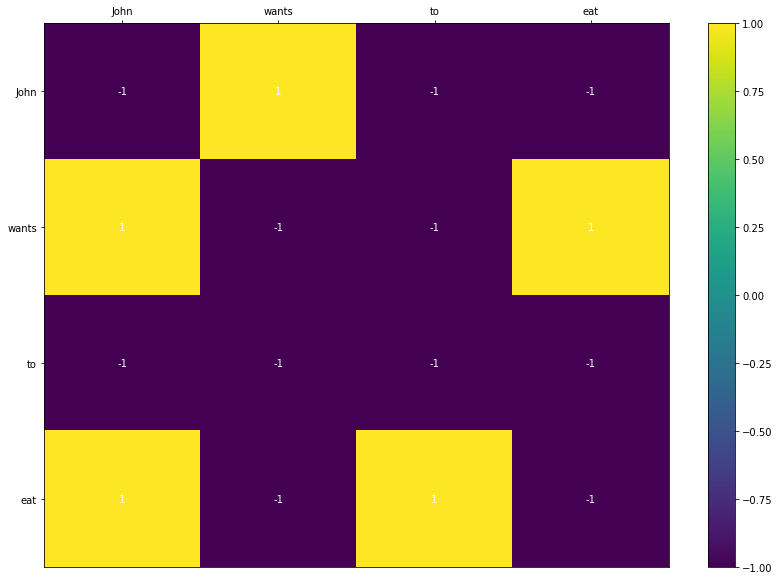

In [40]:
plot_heatmap(padded_tensor, double_sentence)